In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
df = pd.read_csv("sale-coffe-csv.csv")

In [3]:
df

,date,datetime,cash_type,card,money,coffee_name,gender,Unnamed: 7
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,Feminine,NaN
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,Male,NaN
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,Male,NaN
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,Male,NaN
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,Male,NaN
...,...,...,...,...,...,...,...,...
891,2024-06-29,2024-06-29 21:27:22.449,card,ANON-0000-0000-0009,37.72,Latte,Male,NaN
892,2024-06-30,2024-06-30 10:28:09.842,card,ANON-0000-0000-0336,37.72,Latte,Male,NaN
893,2024-06-30,2024-06-30 13:05:50.620,card,ANON-0000-0000-0337,23.02,Espresso,Feminine,NaN
894,2024-06-30,2024-06-30 16:54:41.679,card,ANON-0000-0000-0009,37.72,Hot Chocolate,Male,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         896 non-null    object 
 1   datetime     896 non-null    object 
 2   cash_type    896 non-null    object 
 3   card         807 non-null    object 
 4   money        896 non-null    float64
 5   coffee_name  896 non-null    object 
 6   gender       896 non-null    object 
 7   Unnamed: 7   0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 56.1+ KB


In [5]:
df.describe()

,money,Unnamed: 7
count,896.000000,0.0
mean,34.143906,NaN
std,4.573951,NaN
min,23.020000,NaN
25%,28.900000,NaN
50%,34.500000,NaN
75%,37.720000,NaN
max,40.000000,NaN


In [6]:
df = df.drop('Unnamed: 7', axis=1)

In [7]:
df = df.drop('card', axis=1)

In [8]:
df['city'] = 'Curitiba'

In [9]:
df

,date,datetime,cash_type,money,coffee_name,gender,city
0,2024-03-01,2024-03-01 10:15:50.520,card,38.70,Latte,Feminine,Curitiba
1,2024-03-01,2024-03-01 12:19:22.539,card,38.70,Hot Chocolate,Male,Curitiba
2,2024-03-01,2024-03-01 12:20:18.089,card,38.70,Hot Chocolate,Male,Curitiba
3,2024-03-01,2024-03-01 13:46:33.006,card,28.90,Americano,Male,Curitiba
4,2024-03-01,2024-03-01 13:48:14.626,card,38.70,Latte,Male,Curitiba
...,...,...,...,...,...,...,...
891,2024-06-29,2024-06-29 21:27:22.449,card,37.72,Latte,Male,Curitiba
892,2024-06-30,2024-06-30 10:28:09.842,card,37.72,Latte,Male,Curitiba
893,2024-06-30,2024-06-30 13:05:50.620,card,23.02,Espresso,Feminine,Curitiba
894,2024-06-30,2024-06-30 16:54:41.679,card,37.72,Hot Chocolate,Male,Curitiba


In [10]:
#criando uma nova coluna com a cidade, onde foi realizada as vendas de cafe

df['date'] = pd.to_datetime(df['date'])

In [11]:
#convertendo a coluna 'date', para o formato datetime.

df['datetime'] = df['datetime'].str.split().str[1]

In [12]:
#separando valores da coluna datetime em horas, minutos e segundos.

df['datetime'] = df['datetime'].map(lambda x: str(x)[0:2]) + df['datetime'].map(lambda x: str(x)[2:5]) + df['datetime'].map(lambda x: str(x)[5:8])

In [13]:
#susbtituindo valores 'male' por 'Male', padronizando as linhas da coluna

df['gender'] = df['gender'].astype(str).replace('male','Male')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         896 non-null    datetime64[ns]
 1   datetime     896 non-null    object        
 2   cash_type    896 non-null    object        
 3   money        896 non-null    float64       
 4   coffee_name  896 non-null    object        
 5   gender       896 non-null    object        
 6   city         896 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 49.1+ KB


In [15]:
df

,date,datetime,cash_type,money,coffee_name,gender,city
0,2024-03-01,10:15:50,card,38.70,Latte,Feminine,Curitiba
1,2024-03-01,12:19:22,card,38.70,Hot Chocolate,Male,Curitiba
2,2024-03-01,12:20:18,card,38.70,Hot Chocolate,Male,Curitiba
3,2024-03-01,13:46:33,card,28.90,Americano,Male,Curitiba
4,2024-03-01,13:48:14,card,38.70,Latte,Male,Curitiba
...,...,...,...,...,...,...,...
891,2024-06-29,21:27:22,card,37.72,Latte,Male,Curitiba
892,2024-06-30,10:28:09,card,37.72,Latte,Male,Curitiba
893,2024-06-30,13:05:50,card,23.02,Espresso,Feminine,Curitiba
894,2024-06-30,16:54:41,card,37.72,Hot Chocolate,Male,Curitiba


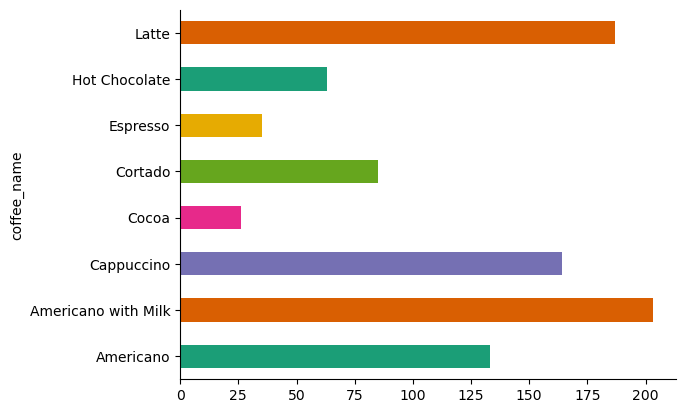

In [16]:
df.groupby('coffee_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
chart = alt.Chart(df).mark_bar().encode(
    x='gender',
    y='count()',
    color='gender'
)
chart


C:\Anaconda\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Anaconda\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)